In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from multiprocessing import Pool, Lock, Process, Manager
import multiprocessing as mp
import multiprocessfunction as fn
import time
import kagglehub

In [15]:
if __name__ == '__main__':
    s_time = time.time()
    path = './data/'
    # Download latest version
    data_path = kagglehub.dataset_download("kazanova/sentiment140")
    data_name = 'training.1600000.processed.noemoticon.csv'
    data_full_name = data_path + "/" + data_name
    df = pd.read_csv(data_full_name, encoding='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])
    df_split = fn.splitDataFrame(df, mp.cpu_count())

    with Pool(mp.cpu_count()) as pool:
        pos_results = pool.starmap(fn.countWord, [(part, 4) for part in df_split])
    
    with Pool(mp.cpu_count()) as pool:
        neg_results = pool.starmap(fn.countWord, [(part, 0) for part in df_split])

    pos_cnt = dict()
    for res in pos_results:
        for key in res:
            pos_cnt[key] = pos_cnt.get(key, 0) + res[key]
    
    neg_cnt = dict()
    for res in neg_results:
        for key in res:
            neg_cnt[key] = neg_cnt.get(key, 0) + res[key]
    e_time = time.time()
    print(e_time - s_time)

7.249222755432129


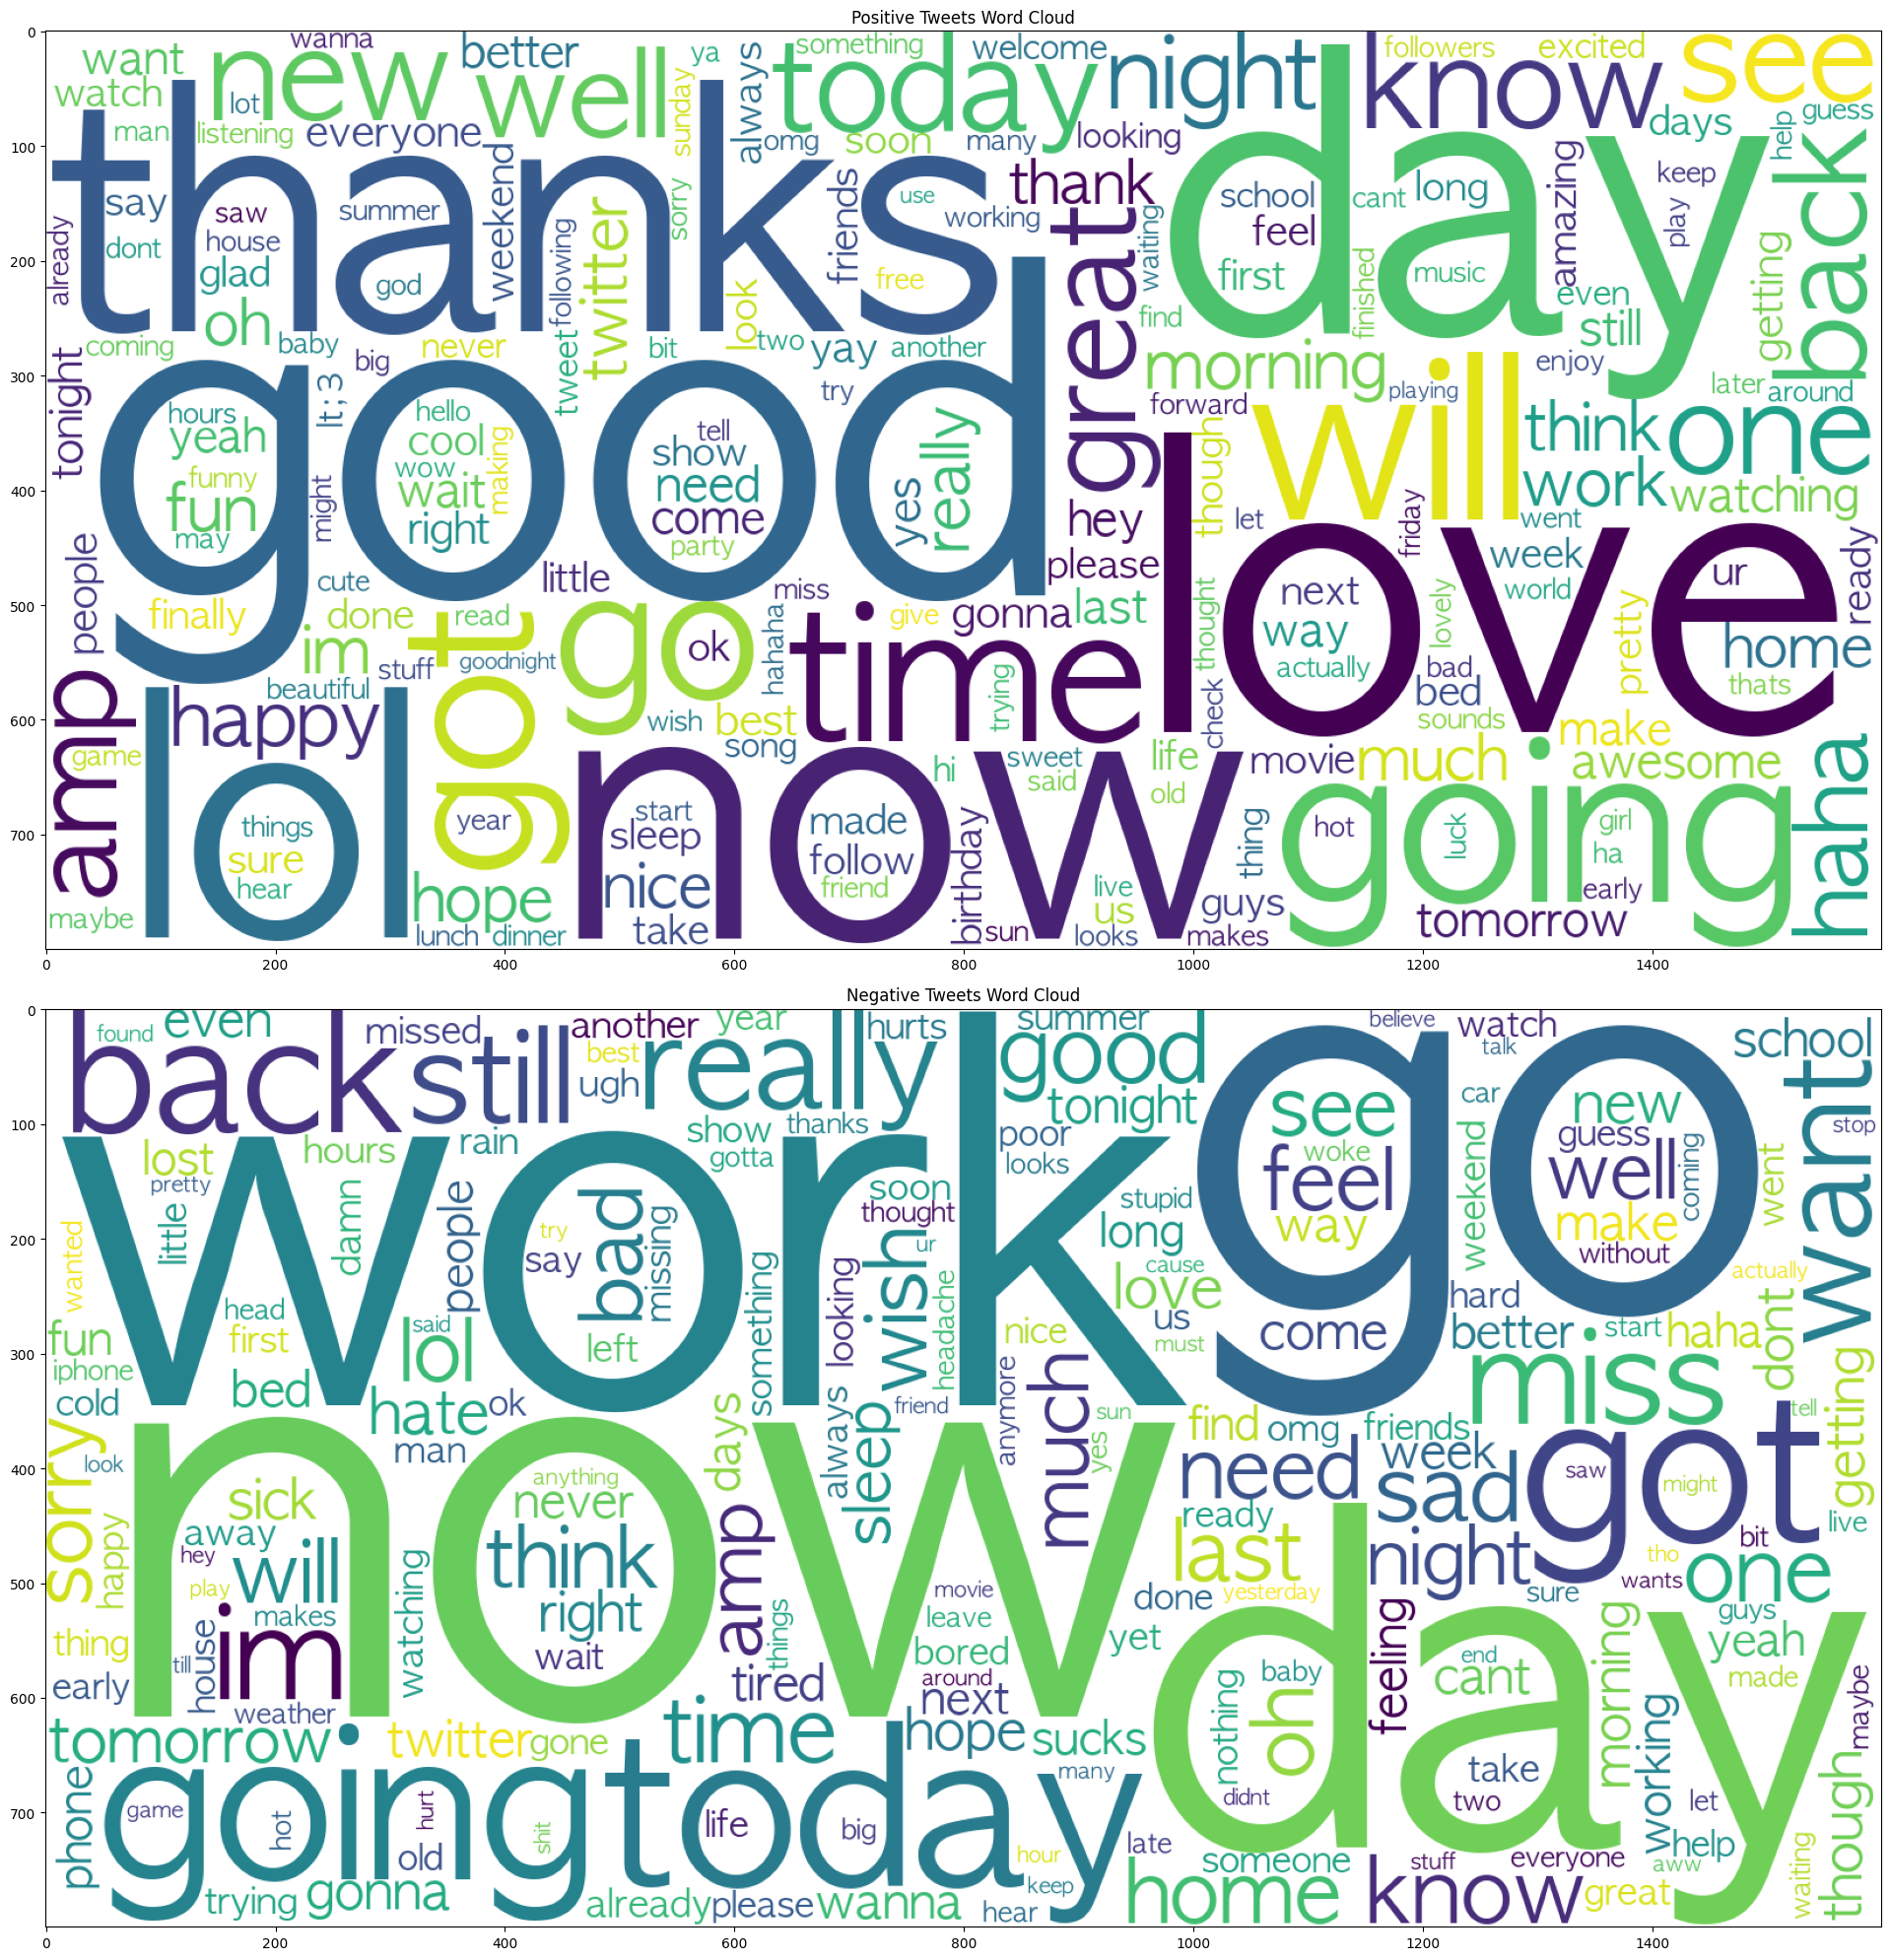

In [16]:
plt.figure(figsize=(40,20))
plt.subplot(211)
wc = WordCloud(
    font_path='AppleGothic',
    max_words=200,
    stopwords=STOPWORDS,
    height=800,
    width=1600,
    background_color='white'
    )
pos_wc_img = wc.generate_from_frequencies(pos_cnt)
plt.imshow(pos_wc_img)
plt.title('Positive Tweets Word Cloud')
plt.subplot(212)
wc = WordCloud(
    font_path='AppleGothic',
    max_words=200,
    stopwords=STOPWORDS,
    height=800,
    width=1600,
    background_color='white'
    )
neg_wc_img = wc.generate_from_frequencies(neg_cnt)
plt.imshow(neg_wc_img)
plt.title('Negative Tweets Word Cloud')
plt.tight_layout();